# Лабораторне заняття №6

# Математичне сподівання та дисперсія
На цьому занятті ми познайомимося з математичним сподіванням та дисперсією розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Математичне сподівання

### 1.1 Дискретні розподіли

Нехай дискретна випадкова величина $\xi$ набуває значень $x_1, x_2, \ldots, x_n$ (це набір усіх можливих значень) з імовірностями $p_1, p_2, \ldots, p_n$.
Тоді її математичне сподівання визначається як
$$\mathsf{E}[\xi] = \sum \limits_{k = 1}^{n} p_k x_k.$$

Реалізуйте відповідну функцію підрахунку математичного сподівання.

In [2]:
def expectation(pk, xk):
    # Місце для Вашого коду
    if len(pk) != len(xk):
        print('Vectors of probabilities and values should have the same lengths!')
        return None
    res = 0
    for i in range(len(pk)):
        res += pk[i] * xk[i]
    return res

#### 1.1.1 Біноміальний розподіл

Розглянемо випадкову величину $\xi$ з біноміального розподілу з параметрами $n = 20, p = 0.6$.
Тобто $\xi \sim Binom(20, 0.6)$.

In [3]:
from scipy.stats import binom

n = 20
p = 0.6

Замість того, щоб явно вказувати параметри розподілу в усіх методах класу **binom**, можна визначити екземпляр цього класу з відповідними параметрами і потім застосовувати необхідні методи до цього екземпляру без задання параметрів розподілу.
Це справедливо для всіх класів статистичних розподілів.

In [4]:
xi = binom(n=n, p=p)

Для обрахунку математичного сподівання необхідно знати всі можливі значення випадкової величини та їх відповідні ймовірності.
Прямого методу для отримання цих значень немає.
Однак, можна отримати найменше та найбільше можливе значення випадкової величини.

In [5]:
x_min = xi.a
x_max = xi.b

Оскільки дискретні випадкові величини набувають лише цілих значень, то тепер можна відтворити всю множину.

In [6]:
xk = np.arange(x_min, x_max+1)

Тепер можна отримати й імовірності усіх значень випадкової величини:
$$p_k = p(x_k) = \mathsf{P}(\xi = x_k), \quad 1 \leq k \leq n.$$

In [7]:
pk = xi.pmf(xk) # Місце для Вашого коду

Зобразимо графік щільності випадкової величини $\xi$.

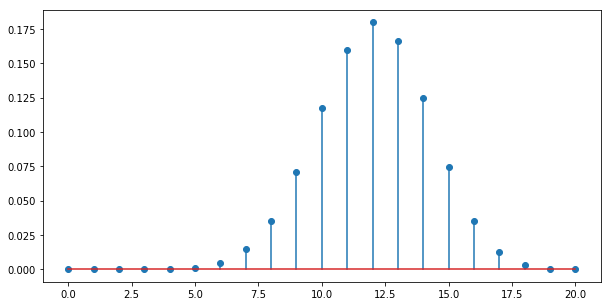

In [8]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду
plt.stem(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

In [9]:
print(expectation(pk, xk))

11.999999999999986


Використовуючи властивості **NumPy**-векторів, обрахунок математичного сподівання можна реалізувати набагато простіше.

Множення **NumPy**-векторів (за допомогою знаку множення **\***) відбувається поелементно.

In [10]:
print(sum(pk * xk))

11.999999999999986


Або використовуючи скалярний добуток (векторне множення).

In [11]:
print(xk.dot(pk))

11.999999999999982


У класах статистичних розподілів підрахунок математичного сподівання реалізований методом **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.mean.html)).

In [12]:
print(xi.mean())

12.0


Математичне сподівання можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [13]:
print(xi.expect())

11.999999999999986


#### 1.1.1 Геометричний розподіл

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.25$.
Тобто $\xi \sim Geom(0.25)$.

In [14]:
from scipy.stats import geom

p = 0.25

In [15]:
xi = geom(p=p)

Для обрахунку математичного сподівання необхідно знати всі можливі значення випадкової величини та їх відповідні ймовірності.
Прямого методу для отримання цих значень немає.
Однак, можна отримати найменше та найбільше можливе значення випадкової величини.

In [16]:
x_min = xi.a
x_max = xi.b

In [17]:
print(x_min, x_max)

1 inf


Верхня межа дорівнює нескінченності, тому можна провести лише ниближені обчислення.

In [18]:
xk = np.arange(x_min, 101)

Тепер можна отримати й імовірності усіх значень випадкової величини:
$$p_k = p(x_k) = \mathsf{P}(\xi = x_k), \quad 1 \leq k \leq n.$$

In [19]:
pk = xi.pmf(xk) # Місце для Вашого коду

Зобразимо графік щільності випадкової величини $\xi$.

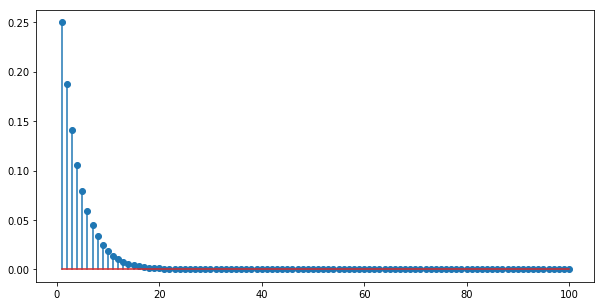

In [20]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду
plt.stem(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

In [21]:
print(expectation(pk, xk))

3.999999999966646


Використовуючи властивості **NumPy**-векторів, обрахунок математичного сподівання можна реалізувати набагато простіше.

Множення **NumPy**-векторів (за допомогою знаку множення **\***) відбувається поелементно.

In [22]:
print(sum(pk * xk))

3.999999999966646


Або використовуючи скалярний добуток (векторне множення).

In [23]:
print(xk.dot(pk))

3.9999999999666453


У класах статистичних розподілів підрахунок математичного сподівання реалізований методом **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.mean.html)).

In [24]:
print(xi.mean())

4.0


Математичне сподівання можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [25]:
print(xi.expect())

3.9999999999999925


### 1.2 Неперервні розподіли

Нехай неперервна випадкова величина $\xi$ має щільність $f(x)$.
Тоді її математичне сподівання визначається як
$$\mathsf{E}[\xi] = \int \limits_{- \infty}^{\infty} x f(x) \, dx.$$

#### 1.2.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу з параметрами $a = -1, b = 4$.
Тобто $\xi \sim Unif(-1, 4)$.

In [26]:
from scipy.stats import uniform

a = -1
b = 4

Пам'ятаємо, що параметри цього розподілу необхідно виразити в аргументах $loc$ та $scale$.

In [27]:
loc = a
scale = b - a

In [28]:
xi = uniform(loc=loc, scale=scale)

Зобразимо графік щільності випадкової величини $\xi$ на відрізку $[a - 1, b + 1]$.

In [29]:
xk = np.arange(a-1, b+1.01, 0.01) # Місце для Вашого коду
pk = xi.pdf(xk) # Місце для Вашого коду

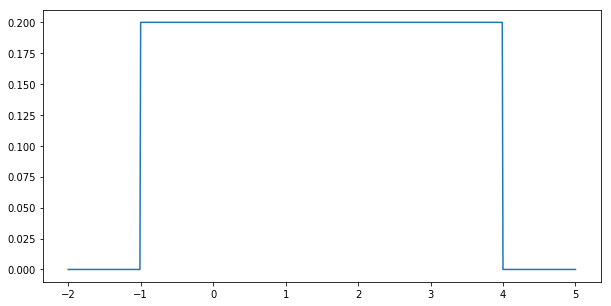

In [30]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду
plt.plot(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

за допомогою методу **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html))

In [31]:
print(xi.mean())

1.5


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [32]:
print(xi.expect())

1.5000000000000002


#### 1.2.1 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ з експоненційного розподілу з параметром $\lambda = 0.75$.
Тобто $\xi \sim Exp(0.75)$.

In [33]:
from scipy.stats import expon

lmd = 0.75

Пам'ятаємо, що параметри цього розподілу необхідно виразити в аргументах $loc$ та $scale$.

In [34]:
loc = 0 # Місце для Вашого коду
scale = 1 / lmd # Місце для Вашого коду

In [35]:
xi = expon(loc=loc, scale=scale)

Зобразимо графік щільності випадкової величини $\xi$ на відрізку $[-1, 10]$.

In [36]:
xk = np.arange(-1, 10.01, 0.01) # Місце для Вашого коду
pk = xi.pdf(xk) # Місце для Вашого коду

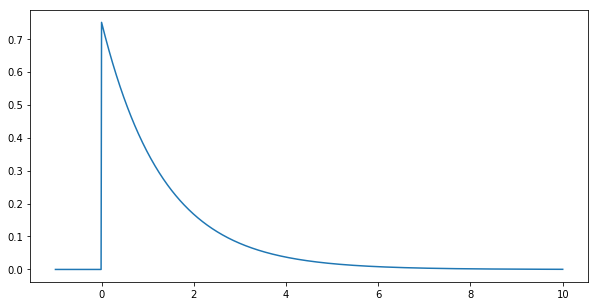

In [37]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду
plt.plot(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

за допомогою методу **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html))

In [38]:
print(xi.mean())

1.3333333333333333


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [39]:
print(xi.expect())

1.3333333333333333


## 2 Дисперсія

Для випадкової величини $\xi$ дисперсія визначається як
$$\mathsf{D}(\xi) = \mathsf{Var}[\xi]
= \mathsf{E} \left[ \left( \xi - \mathsf{E}[\xi] \right)^2 \right]
= \mathsf{E}[\xi^2] - \left( \mathsf{E}[\xi] \right)^2.$$

### 1.1 Дискретні розподіли

Нехай дискретна випадкова величина $\xi$ набуває значень $x_1, x_2, \ldots, x_n$ (це набір усіх можливих значень) з імовірностями $p_1, p_2, \ldots, p_n$.
Тоді для деякої функції $g$ математичне сподівання випадкової величини $g(\xi)$ визначається як
$$\mathsf{E}[g(\xi)] = \sum \limits_{k = 1}^{n} p_k g(x_k).$$

#### 1.1.1 Біноміальний розподіл

Розглянемо випадкову величину $\xi$ з біноміального розподілу з параметрами $n = 20, p = 0.6$.
Тобто $\xi \sim Binom(20, 0.6)$.

In [40]:
from scipy.stats import binom

n = 20
p = 0.6

In [41]:
xi = binom(n=n, p=p)

In [42]:
x_min = xi.a
x_max = xi.b

In [43]:
xk = np.arange(x_min, x_max+1)

In [44]:
pk = xi.pmf(xk)

Тоді дисперсія випадкової величини $\xi$ дорівнює:

In [45]:
g_xk = (xk - expectation(pk, xk))**2
print(expectation(pk, g_xk))

4.79999999999999


У класах статистичних розподілів підрахунок дисперсії реалізований методом **var** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.var.html)).

In [46]:
print(xi.var())

4.800000000000001


Дисперсію можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [47]:
def f(x):
    return (x - xi.expect())**2
print(xi.expect(f))

4.799999999999991


#### 1.1.2 Геометричний розподіл
Реалізуйте підрахунок дисперсії для $\xi \sim Geom(0.25)$ трьома способами:
- за допомогою методу **var**;
- за допомогою методу **expect** та формули для дисперсії 
$\mathsf{D}(\xi) = \mathsf{E} \left[ \left( \xi - \mathsf{E}[\xi] \right)^2 \right]$;
- за допомогою методу **expect** та формули для дисперсії
$\mathsf{D}(\xi) = \mathsf{E}[\xi^2] - \left( \mathsf{E}[\xi] \right)^2$.

In [49]:
# Місце для Вашого коду
from scipy.stats import geom

p = 0.25

xi = geom(p=p)

print(xi.var())
def f(x):
    return (x - xi.expect())**2
print(xi.expect(f))
def f(x):
    return (x)**2
print(xi.expect(f)-xi.expect()**2)

12.0
11.999999999999996
12.00000000000006


### 1.2 Неперервні розподіли

Нехай неперервна випадкова величина $\xi$ має щільність $f(x)$.
Тоді для деякої функції $g$ математичне сподівання випадкової величини $g(\xi)$ визначається як
$$\mathsf{E}[g(\xi)] = \int \limits_{- \infty}^{\infty} g(x) f(x) \, dx.$$

#### 1.2.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу з параметрами $a = -1, b = 4$.
Тобто $\xi \sim Unif(-1, 4)$.

In [50]:
from scipy.stats import uniform

a = -1
b = 4

In [51]:
loc = a
scale = b - a

In [52]:
xi = uniform(loc=loc, scale=scale)

Тоді дисперсія випадкової величини $\xi$ дорівнює:

за допомогою методу **var** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.var.html))

In [53]:
print(xi.var())

2.083333333333333


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [54]:
print(xi.expect(f))

4.333333333333334


#### 1.2.2 Експоненційний розподіл
Реалізуйте підрахунок дисперсії для $\xi \sim Exp(0.75)$ трьома способами:
- за допомогою методу **var**;
- за допомогою методу **expect** та формули для дисперсії 
$\mathsf{D}(\xi) = \mathsf{E} \left[ \left( \xi - \mathsf{E}[\xi] \right)^2 \right]$;
- за допомогою методу **expect** та формули для дисперсії
$\mathsf{D}(\xi) = \mathsf{E}[\xi^2] - \left( \mathsf{E}[\xi] \right)^2$.

In [55]:
# Місце для Вашого коду
from scipy.stats import uniform

lmd = 0.75

loc = 0
scale = 1 / lmd

xi = uniform(loc=loc, scale=scale)

print(xi.var())
def f(x):
    return (x - xi.expect())**2
print(xi.expect(f))
def f(x):
    return (x)**2
print(xi.expect(f)-xi.expect()**2)

0.14814814814814814
0.14814814814814808
0.14814814814814814


## 3 Метод `stats`

Повертає математичне сподівання та дисперсію випадкової величини.

In [56]:
xi = binom(n=20, p=0.6)
print(xi.stats())

(array(12.), array(4.8))


In [57]:
xi = uniform(-1, 5)
print(xi.stats())

(array(1.5), array(2.08333333))


## 4 Задачі

### 4.1 Кількість шісток

Нехай випадкова величина $\xi$ - це кількість шісток після $n$ кидків грального кубика.

Напишіть функцію для обрахунку математичного сподівання та дисперсії випадкової величини $\xi$ в залежності від кількості $n$ кидків кубика методом повного перебору.
Виведіть результат для $n = 1, 3, 6, 9.$

Який розподіл має випадкова величина $\xi$?
Порівняйте математичне сподівання та дисперсію цього розподілу з обчисленими повним перебором.

In [1]:
# Місце для Вашого коду
from itertools import product

def six_exp(n=6):
    s = 0
    s1 = 0
    total = 0
    for x in product(range(1,7), repeat=n):
        s += sum([1 if elem == 6 else 0 for elem in x])
        s1 += sum([1 if elem == 6 else 0 for elem in x])**2
        total += 1
    print('n = {}'.format(n))
    print('Expectation via product = {}'.format(s/total))
    print('Theoretical expectation = {}'.format(n/6))
    print('Variance via product = {}'.format(s1/total-(s/total)**2))
    print('Theoretical variance = {}'.format(5*n/36))
    print('='*100)

In [2]:
params = [1,3,6,9]

for n in params:
    six_exp(n)

n = 1
Expectation via product = 0.16666666666666666
Theoretical expectation = 0.16666666666666666
Variance via product = 0.1388888888888889
Theoretical variance = 0.1388888888888889
n = 3
Expectation via product = 0.5
Theoretical expectation = 0.5
Variance via product = 0.41666666666666663
Theoretical variance = 0.4166666666666667
n = 6
Expectation via product = 1.0
Theoretical expectation = 1.0
Variance via product = 0.8333333333333333
Theoretical variance = 0.8333333333333334
n = 9
Expectation via product = 1.5
Theoretical expectation = 1.5
Variance via product = 1.25
Theoretical variance = 1.25


### 4.2 Кількість старших карт

Нехай випадкова величина $\xi$ - це кількість старших карт (валет, дама, король, туз) із $n$ карт вибраних навмання із колоди $52$ карт.

Напишіть функцію для обрахунку математичного сподівання та дисперсії випадкової величини $\xi$ в залежності від кількості $n$ кидків кубика методом повного перебору.
Виведіть результат для $n = 1, 2, 3, 4, 5.$

Який розподіл має випадкова величина $\xi$?
Порівняйте математичне сподівання та дисперсію цього розподілу з обчисленими повним перебором.

In [5]:
# Місце для Вашого коду
# Визначимо номінали, масті та карти
Ranks = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K'}
Suits = {'♢', '♠', '♣', '♡'}
# Створимо колоду карт
Cards = [(Rank, Suit) for Rank in Ranks for Suit in Suits]
print(Cards)

[('J', '♡'), ('J', '♢'), ('J', '♣'), ('J', '♠'), ('4', '♡'), ('4', '♢'), ('4', '♣'), ('4', '♠'), ('7', '♡'), ('7', '♢'), ('7', '♣'), ('7', '♠'), ('Q', '♡'), ('Q', '♢'), ('Q', '♣'), ('Q', '♠'), ('2', '♡'), ('2', '♢'), ('2', '♣'), ('2', '♠'), ('3', '♡'), ('3', '♢'), ('3', '♣'), ('3', '♠'), ('9', '♡'), ('9', '♢'), ('9', '♣'), ('9', '♠'), ('1', '♡'), ('1', '♢'), ('1', '♣'), ('1', '♠'), ('K', '♡'), ('K', '♢'), ('K', '♣'), ('K', '♠'), ('8', '♡'), ('8', '♢'), ('8', '♣'), ('8', '♠'), ('5', '♡'), ('5', '♢'), ('5', '♣'), ('5', '♠'), ('6', '♡'), ('6', '♢'), ('6', '♣'), ('6', '♠'), ('10', '♡'), ('10', '♢'), ('10', '♣'), ('10', '♠')]


In [8]:
from itertools import combinations

def rank_exp(n=4, ranks='JQK1'):
    s1 = 0
    s2 = 0
    total = 0
    for x in combinations(Cards, n):
        s = 0
        for el in x:
            if el[0] in ranks:
                s += 1
        s1 += s
        s2 += s**2
        total += 1
    print('n = {}'.format(n))
    N = len(ranks)*4
    M = 52
    print('Expectation via combinations = {}'.format(s1/total))
    print('Theoretical expectation = {}'.format(N*n/M))
    print('Variance via product = {}'.format(s2/total-(s1/total)**2))
    print('Theoretical variance = {}'.format(n*N/M*(M-n)/M*(M-N)/(M-1)))
    print('='*100)

In [9]:
params = [1,2,3,4,5]

for n in params:
    rank_exp(n)

n = 1
Expectation via combinations = 0.3076923076923077
Theoretical expectation = 0.3076923076923077
Variance via product = 0.21301775147928995
Theoretical variance = 0.21301775147928997
n = 2
Expectation via combinations = 0.6153846153846154
Theoretical expectation = 0.6153846153846154
Variance via product = 0.41768186564566645
Theoretical variance = 0.4176818656456666
n = 3
Expectation via combinations = 0.9230769230769231
Theoretical expectation = 0.9230769230769231
Variance via product = 0.6139923424991296
Theoretical variance = 0.6139923424991298
n = 4
Expectation via combinations = 1.2307692307692308
Theoretical expectation = 1.2307692307692308
Variance via product = 0.8019491820396798
Theoretical variance = 0.8019491820396798
n = 5
Expectation via combinations = 1.5384615384615385
Theoretical expectation = 1.5384615384615385
Variance via product = 0.9815523842673164
Theoretical variance = 0.9815523842673164


### 4.3 Довжина серії гербів

Нехай випадкова величина $\xi$ - це довжина серії гербів із $n$ підкидань монетки.

Напишіть функцію для обрахунку математичного сподівання та дисперсії випадкової величини $\xi$ в залежності від кількості $n$ кидків кубика методом повного перебору.
Виведіть результат для $n = 1, 2, 3, 5, 10, 15, 20.$

Який розподіл має випадкова величина $\xi$ при $n = \infty$?
Порівняйте математичне сподівання та дисперсію цього розподілу з обчисленими повним перебором.

In [26]:
# Місце для Вашого коду
from itertools import product
import numpy as np

def head_exp(n=6):
    s = [[] for _ in range(n)]
    total = 0
    for x in product(range(2), repeat=n):
        heads = []
        k = 0
        for i in range(n):
            if x[i] == 1:
                k += 1
                for j in range(k):
                    s[j].append(j+1)
                
                #if i == n-1:
                #    heads.append(k)
            else:
                #heads.append(k)
                k = 0
        #s += max(heads)
        total += 1
        #print(x, heads, max(heads))
    #print(s)
    x1 = [sum(x) for x in s]
    x2 = [(n-k)*total for k in range(n)]
    x3 = [sum(np.array(x)**2) for x in s]
    print('n = {}'.format(n))
    print('Expectation via product = {}'.format(sum(x1[i]/x2[i] for i in range(n))))
    print('Theoretical expectation = {}'.format(sum(k/2**k for k in range(1,n+1))))
    print('Variance via product = {}'.format(sum(x3[i]/x2[i] for i in range(n))-sum(x1[i]/x2[i] for i in range(n))**2))
    print('Theoretical variance = {}'.format(sum(k**2/2**k for k in range(1,n+1))-sum(k/2**k for k in range(1,n+1))**2))
    print('='*100)

In [27]:
params = [1,2,3,5,10,15,20]

for n in params:
    head_exp(n)

n = 1
Expectation via product = 0.5
Theoretical expectation = 0.5
Variance via product = 0.25
Theoretical variance = 0.25
n = 2
Expectation via product = 1.0
Theoretical expectation = 1.0
Variance via product = 0.5
Theoretical variance = 0.5
n = 3
Expectation via product = 1.375
Theoretical expectation = 1.375
Variance via product = 0.734375
Theoretical variance = 0.734375
n = 5
Expectation via product = 1.78125
Theoretical expectation = 1.78125
Variance via product = 1.2333984375
Theoretical variance = 1.2333984375
n = 10
Expectation via product = 1.98828125
Theoretical expectation = 1.98828125
Variance via product = 1.9041595458984375
Theoretical variance = 1.9041595458984375
n = 15
Expectation via product = 1.999481201171875
Theoretical expectation = 1.999481201171875
Variance via product = 1.993194310925901
Theoretical variance = 1.993194310925901
n = 20
Expectation via product = 1.999979019165039
Theoretical expectation = 1.999979019165039
Variance via product = 1.9996204371818749